In [40]:
import math
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import numpy.random as random

In [41]:
A = np.array([1,2,3,5,1,5,1,8])
A.sort()
print(A)

[1 1 1 2 3 5 5 8]


In [42]:
def bernoulli(p):
    """Fontion de répartition d'une variable aléatoire de Bernoulli"""
    plt.step([-1,0,1,1,2],[0,0,1-p,1,1],label = f'p={p}')
    plt.grid(True)
    plt.legend()

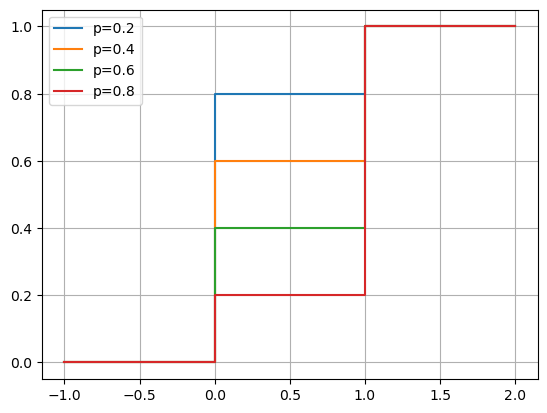

In [43]:
#Test de cette fonction:
for p in [0.2,0.4,0.6,0.8]:
    bernoulli(p)

In [44]:
def uniforme_discrete(X):
    """Fonction de répartition d'une loi uniforme discrète"""
    card = len(X)
    y = [0]
    X.sort()    
    X = [X[0]-1] + X + [X[-1]+1]
    for i in range(card+1):
        y.append(i/card)
    plt.step(X,y,label='loi uniforme discrète')
    plt.legend()
    plt.grid(True)

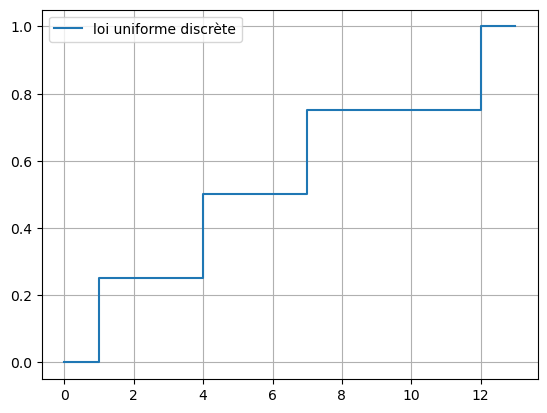

In [45]:
#Test de cette fonction:
uniforme_discrete([1,4,7,12])

In [46]:
def uniforme_desité(a,b,card):
    """Fonction de répartition d'une loi uniforme à densité"""
    x = np.linspace(a,b,card)
    y = np.zeros(card)
    for i in range(card):
        y[i] = i/card
    x = np.concatenate((np.linspace(-1,0,card), x ,np.linspace(1,2,card)))
    y = np.concatenate((np.zeros(card),y,np.ones(card)))
    plt.plot(x,y,label='Loi uniforme')
    plt.legend() 
    plt.grid(True)

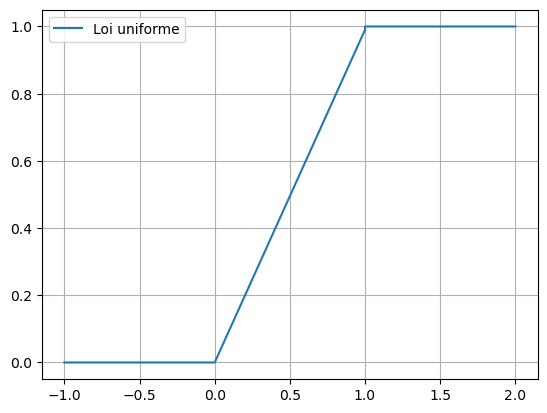

In [47]:
#Test de cette fonction:
uniforme_desité(0,1,100)

In [48]:
def TraceFctReEmpirique(X0):
    """Fontion qui trace la fontion de répartition empirique d'une variable aléatoire"""
    card = len(X0)
    y = [0]
    X = X0
    X.sort()
    X = np.concatenate((np.array([X[0]-1]), X , np.array([X[-1]+1])))
    for i in range(card+1):
        y.append(i/card)
    plt.step(X,y,label=f'Card = {card}')
    plt.legend()
    plt.grid(True)

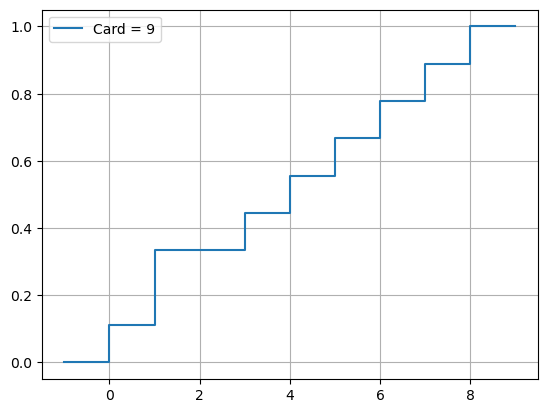

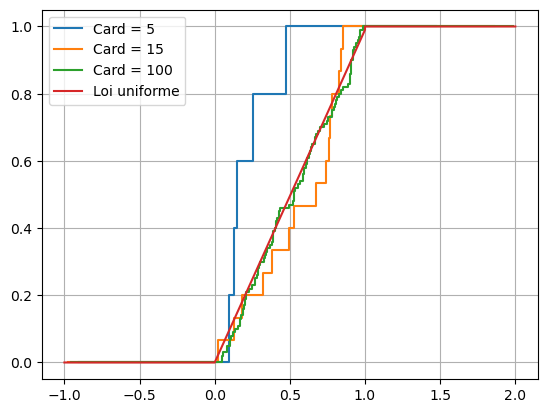

In [49]:
TraceFctReEmpirique([0,1,8,6,3,1,7,4,5])
plt.figure()
for n in [5,15,100]:
    TraceFctReEmpirique(np.random.rand(n))
uniforme_desité(0,1,100)

In [54]:
def invers(U,lamb):
    """Fontion retournant l'inverse d'une fonction de répartition exponetiel(U) ou U suit un loi unifome([0,1])"""
    return (-1/lamb) * np.log(1-U)

def exp_sim(lamb):
    """Fontion de répartion exponentiel(λ,U) où U suit une uniforme([0,1])"""
    return invers(random.rand(),lamb)

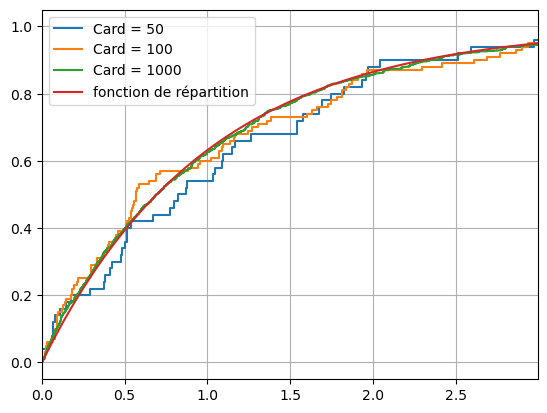

In [51]:
#Paramètres:
lamb = 1
m_lam = -np.log(0.05)/lamb 

N = [50,100,1000]
for n in N:
    U = []
    for i in range(n):
        U.append(exp_sim(lamb))
    TraceFctReEmpirique(U)

x = np.linspace(0.01,m_lam)
y = 1-np.exp(-lamb * x)
plt.plot(x,y,label=f'fonction de répartition')
plt.legend()
plt.axis([0,m_lam,-0.05,1.05])
plt.show()

In [52]:
def Fx(x):
    """Fontion de l'énoncé"""
    return np.arctan(x)/np.pi + 1/2

def invers_F(x):
    """Fontion inverse de Fx"""
    return np.tan(np.pi*(x-1/2))

def Cauchy():
    """Fontion de répartion d'un loi de Cauchy par la fontion inverse de Fx"""
    return invers_F(random.rand())

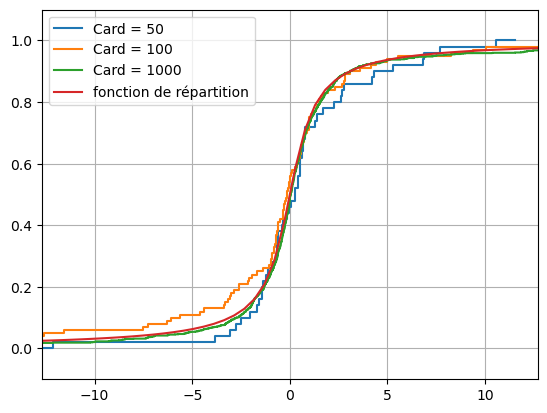

In [53]:
#Paramètres:
m = np.tan(np.pi*0.475)

N = [50,100,1000]
for n in N:
    Ux = []
    for i in range(n):
        Ux.append(Cauchy())
    TraceFctReEmpirique(Ux)
    
x = np.linspace(-m,m)
y = Fx(x)
plt.plot(x,y,label='fonction de répartition')
plt.legend()
plt.axis([-m,m,-0.1,1.1])
plt.show()